# EE7204 -Computer Vision and Image Processing 

## Take Home Assignment 2 - EG/2020/4360

### 01. Create a synthetic image with 3 regions

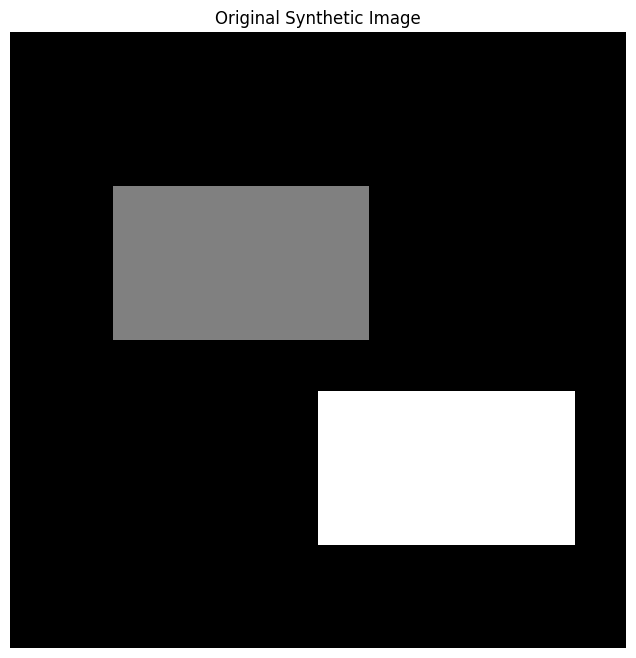

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

synthetic = np.zeros((120, 120), dtype=np.uint8)
synthetic[30:60, 20:70] = 80   # Object 1
synthetic[70:100, 60:110] = 160 # Object 2

plt.figure(figsize=(8, 8))
plt.imshow(synthetic, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')
plt.show()



### 02. Add Gaussian noise

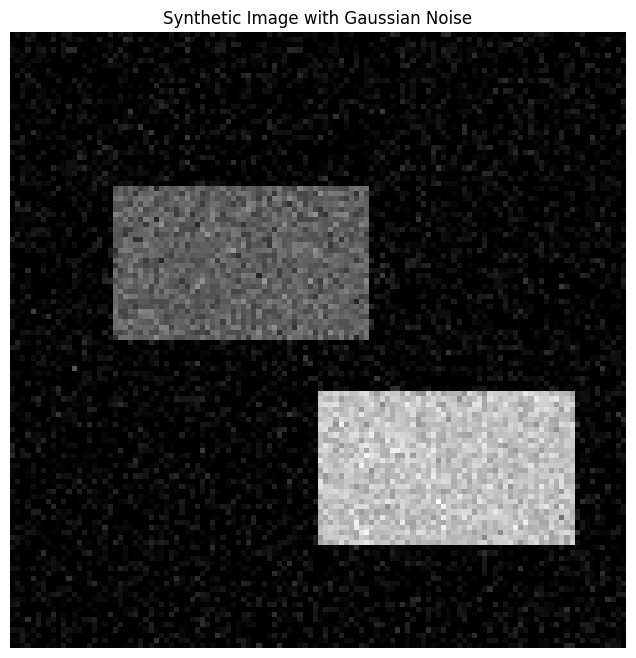

In [18]:
noise = np.random.normal(0, 15, synthetic.shape)
noisy = np.clip(synthetic + noise, 0, 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(noisy, cmap='gray')
plt.title("Synthetic Image with Gaussian Noise")
plt.axis('off')
plt.show()


### 03. Apply Otsu's thresholding

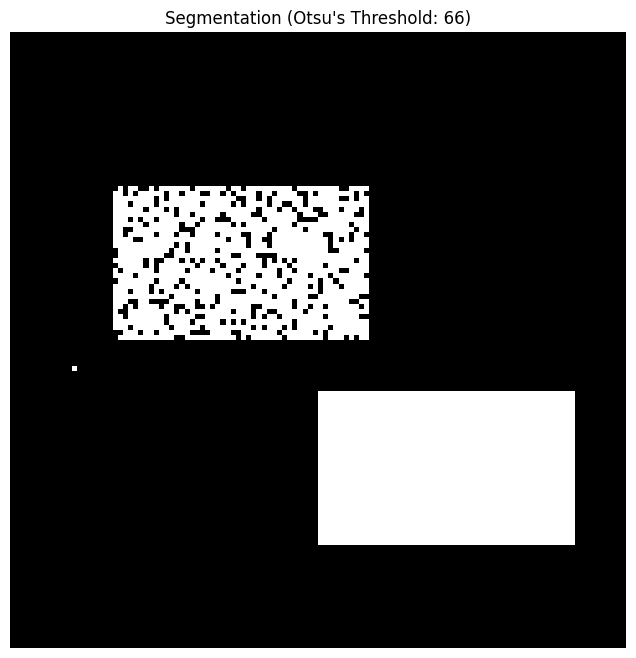

In [20]:
thresh = threshold_otsu(noisy)
binary = (noisy > thresh).astype(np.uint8) * 255

plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title(f"Segmentation (Otsu's Threshold: {thresh})")
plt.axis('off')
plt.show()


### 04. Region Growing Segmentation Implementation

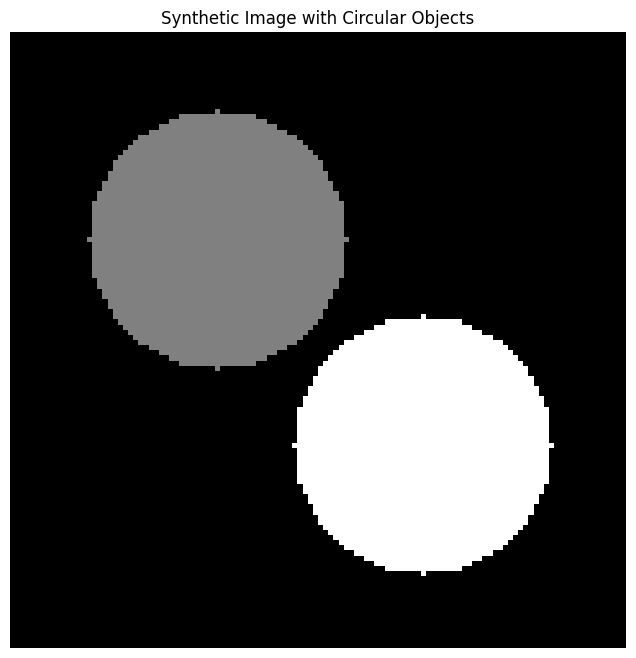

In [14]:
def region_growing(image, seed, threshold=10):
    rows, cols = image.shape
    visited = np.zeros_like(image, dtype=bool)
    segmented = np.zeros_like(image, dtype=np.uint8)
    seed_value = image[seed]
    queue = [seed]

    while queue:
        x, y = queue.pop(0)
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))
    return segmented

circle_img = np.zeros((120, 120), dtype=np.uint8)
cv2.circle(circle_img, (40, 40), 25, 90, -1)   # Lower-intensity object
cv2.circle(circle_img, (80, 80), 25, 180, -1)  # Higher-intensity object

plt.figure(figsize=(8, 8))
plt.imshow(circle_img, cmap='gray')
plt.title("Synthetic Image with Circular Objects")
plt.axis('off')
plt.show()

### 05. Region growing from two seeds

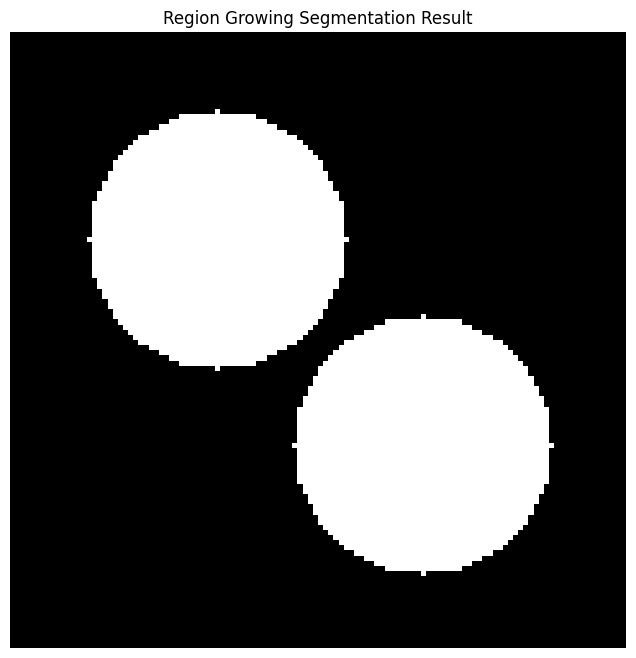

In [10]:
seed1 = (40, 40)
seg1 = region_growing(circle_img, seed1, threshold=15)

seed2 = (80, 80)
seg2 = region_growing(circle_img, seed2, threshold=15)

combined = np.maximum(seg1, seg2)

plt.figure(figsize=(8, 8))
plt.imshow(combined, cmap='gray')
plt.title("Region Growing Segmentation Result")
plt.axis('off')
plt.show()